Reference: https://github.com/enakai00/jupyter_tfbook

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

$$ f(x_1, x_2) = w_0 + w_1 x_1 + w_2 x_2 = 0 $$

$$ x_2 = - (\frac{w_1}{w_2} x_1 + \frac{w_0}{w_2}) $$

Sigmoid function

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

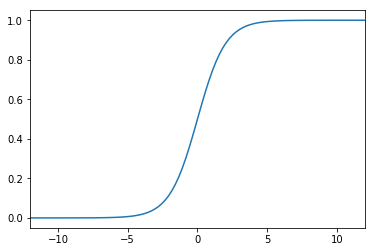

In [3]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(-12, 12)
x = np.linspace(-12, 12, 100)
y = 1/(1 + np.exp(-x))
subplot.plot(x, y)

$$ P(x_1, x_2) = \sigma(f(x_1, x_2)) $$

$$ P = \prod_{n=1}^{N} \bigl\{P(x_{1n},x_{2n})\bigr\}^{t_n} \bigl\{1 - P(x_{1n},x_{2n})\bigr\}^{1-t_n} $$

$$ E = -\log P $$

$$ \log ab = \log a + \log b, \log a~n = n \log a $$

Error function

$$ E = -\log \prod_{n=1}^{N} \bigl\{P(x_{1n},x_{2n})\bigr\}^{t_n} \bigl\{1 - P(x_{1n},x_{2n})\bigr\}^{1-t_n}
= -\sum_{n=1}^{N} \bigl[ t_n \log P(x_{1n},x_{2n}) + (1 - t_n)\log \bigl\{1 - P(x_{1n},x_{2n}) \bigr\} \bigr] 
$$



In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
from pandas import DataFrame, Series

In [5]:
np.random.seed(20180729)

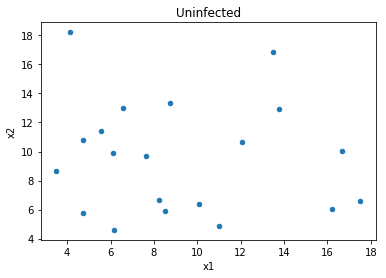

In [6]:
n0 , mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0, n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0.plot(x='x1', y='x2', kind='scatter', title='Uninfected')
df0['t'] = 0

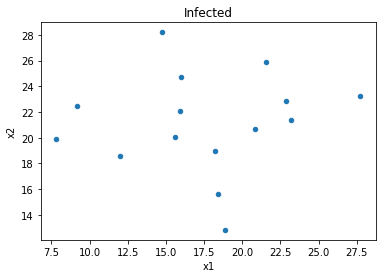

In [7]:
n1 , mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1.plot(x='x1', y='x2', kind='scatter', title='Infected')
df1['t'] = 1

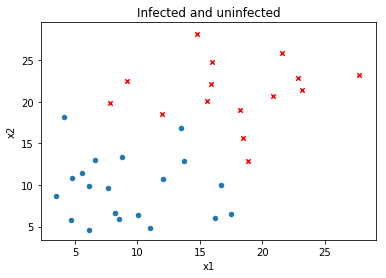

In [8]:
ax = df0.plot(x='x1', y='x2', kind='scatter', marker='o', title='Infected and uninfected')
df1.plot(x='x1', y='x2', kind='scatter', ax=ax, c='r', marker='x')

In [9]:
df = pd.concat([df0, df1], ignore_index=True)

In [10]:
print(permutation(df.index))

[15 13 32 11 21 16 25  6 29 14 19 27 31  7 24  0 17 20 26  3 12 22 10  5
 28  2 33  8  4  1  9 18 30 34 23]


In [11]:
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)
train_set.tail()

,x1,x2,t
30,15.900156,22.085124,1
31,18.882366,12.836824,1
32,8.230046,6.670356,0
33,12.048822,10.673908,0
34,14.767127,28.201067,1


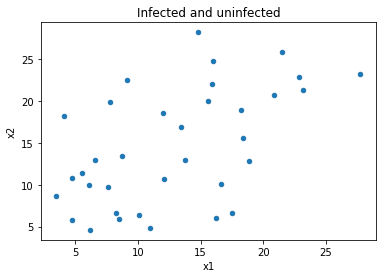

In [12]:
df.plot(x='x1', y='x2', kind='scatter', title='Infected and uninfected')

$$
\boldsymbol{X} =
\begin{pmatrix}
      x_{11} & x_{21} \\
      x_{12} & x_{22} \\
      x_{13} & x_{23} \\      
      \vdots & \vdots \\
\end{pmatrix}
,
\boldsymbol{t} =
\begin{pmatrix}
      t_1 \\
      t_2 \\
      t_3 \\      
      \vdots \\
\end{pmatrix}
$$

In [13]:
# extract x1 and x2 as ndarray matrix
train_x = train_set[['x1', 'x2']].as_matrix()
print(train_x[:5])

[[22.8535532  22.89425088]
 [ 6.5626362  12.97684129]
 [ 6.1295734   9.91399038]
 [ 7.63781863  9.69133222]
 [13.46704031 16.83473738]]


In [14]:
train_t = train_set['t'].as_matrix()
print(train_t)

[1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1]


In [15]:
train_t = train_t.reshape([len(train_set), 1])
print(train_t[:5])

[[1]
 [0]
 [0]
 [0]
 [0]]


$$
\begin{pmatrix}
      f_1 \\
      f_2 \\
      f_3 \\      
      \vdots \\
\end{pmatrix}
=
\begin{pmatrix}
      x_{11} & x_{21} \\
      x_{12} & x_{22} \\
      x_{13} & x_{23} \\      
      \vdots & \vdots \\
\end{pmatrix}
\begin{pmatrix}
      w_1 \\
      w_2 \\
\end{pmatrix}
+
\begin{pmatrix}
      w_0 \\
      w_0 \\
      w_0 \\
      \vdots
\end{pmatrix}
$$

$$
\begin{pmatrix}
      P_1 \\
      P_2 \\
      P_3 \\      
      \vdots \\
\end{pmatrix}
=
\begin{pmatrix}
      \sigma(f_1) \\
      \sigma(f_2) \\
      \sigma(f_3) \\      
      \vdots \\
\end{pmatrix}
$$

In [16]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)

In [17]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [18]:
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 2000 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        print('Step: {}, Loss: {}, Accuracy: {}'.format(i, loss_val, acc_val))   

Step: 2000, Loss: 14.795561790466309, Accuracy: 0.9142857193946838
Step: 4000, Loss: 10.40548324584961, Accuracy: 0.9428571462631226
Step: 6000, Loss: 7.8454766273498535, Accuracy: 0.9714285731315613
Step: 8000, Loss: 6.235874176025391, Accuracy: 0.9714285731315613
Step: 10000, Loss: 5.169573783874512, Accuracy: 0.9714285731315613
Step: 12000, Loss: 4.43589448928833, Accuracy: 0.9714285731315613
Step: 14000, Loss: 3.916804313659668, Accuracy: 0.9714285731315613
Step: 16000, Loss: 3.5422515869140625, Accuracy: 0.9714285731315613
Step: 18000, Loss: 3.268566370010376, Accuracy: 0.9714285731315613
Step: 20000, Loss: 3.0672473907470703, Accuracy: 0.9714285731315613


In [21]:
w0_val, w_val = sess.run([w0, w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print(w0_val, w1_val, w2_val)

-15.942015 0.41189247 0.67346525


In [22]:
train_set0 = train_set[train_set['t']==0]
train_set0.head()

,x1,x2,t
1,6.562636,12.976841,0
2,6.129573,9.913990,0
3,7.637819,9.691332,0
4,13.467040,16.834737,0
7,10.064689,6.412609,0


In [23]:
train_set1 = train_set[train_set['t']==1]
train_set1.head()

,x1,x2,t
0,22.853553,22.894251,1
5,27.743189,23.267948,1
6,11.976128,18.568326,1
9,9.173850,22.485613,1
16,18.237881,18.981257,1


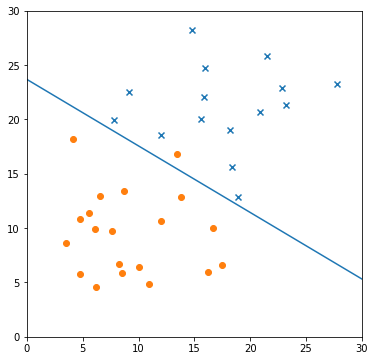

In [24]:
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0,30,10)
liney = - (w1_val*linex/w2_val + w0_val/w2_val)
subplot.plot(linex, liney)

In [25]:
n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0, n0)
df0 = DataFrame(data0, columns=['x', 'y'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x', 'y'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)
#print(df)

In [26]:
num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]
#print(train_set)
#print(test_set)

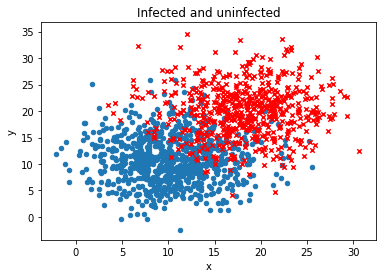

In [27]:
ax = df0.plot(x='x', y='y', kind='scatter', marker='o', title='Infected and uninfected')
df1.plot(x='x', y='y', kind='scatter', ax=ax, c='r', marker='x')

In [28]:
train_x = train_set[['x', 'y']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

test_x = test_set[['x', 'y']].as_matrix()
test_t = test_set['t'].as_matrix().reshape([len(test_set), 1])

In [29]:
train_accuracy = []
test_accuracy = []
for _ in range(2500):
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    acc_val = sess.run(accuracy, feed_dict={x:train_x, t:train_t})
    train_accuracy.append(acc_val)
    acc_val = sess.run(accuracy, feed_dict={x:test_x, t:test_t})
    test_accuracy.append(acc_val)    
#print(train_accuracy)
#print(test_accuracy)

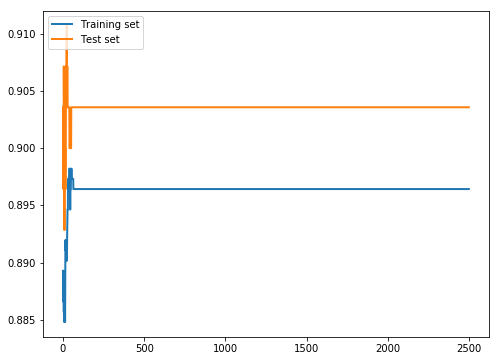

In [30]:
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(train_accuracy)), train_accuracy, linewidth=2, label='Training set')
subplot.plot(range(len(test_accuracy)), test_accuracy, linewidth=2, label='Test set')
subplot.legend(loc='upper left')